# Initial data exploration

In [16]:
#libary import
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import math

In [11]:
data_set = pd.read_csv("../data/raw/emnist-digits-train.csv",header=None)

In [13]:
data_set.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,240000.000000,240000.0,240000.0,240000.0,240000.0,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,...,240000.0,240000.000000,240000.000000,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0
mean,4.500000,0.0,0.0,0.0,0.0,0.000075,0.000529,0.000529,0.000542,0.000508,...,0.0,0.000138,0.000138,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872287,0.0,0.0,0.0,0.0,0.036742,0.259238,0.259238,0.257326,0.241005,...,0.0,0.067361,0.067361,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,18.000000,127.000000,127.000000,126.000000,118.000000,...,0.0,33.000000,33.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
#only use a small sample of the data
sampled_data_set = data_set.iloc[:20]
print("sampled data shape :",sampled_data_set.shape)

sampled data shape : (20, 785)


In [103]:
#trying to display picture
#in our case we have only 28*28 picture

def display_pictures(data,height_picture,width_picture, height_plot, width_plot,debug=False):
    data_without_label = data.iloc[:,1:] #remove label columns (index 0)
    picture_list = []
    picture_matrix = np.array(np.zeros([height_picture,width_picture]))

    for picture in range(data_without_label.shape[0]):

        if(debug):
            print("picture_id :",picture)
        # init row and col index to fill in picture matrix with the proper pixel
        # -> picture are shaped in 1-D list in our data set and we have to shaped them in 28*28 matrix
        row = 0
        col = 0
        for pixel in range(data_without_label.shape[1]):

            if(debug):
                print("row :",row)
                print("col :",col)
                print("pixel :",pixel)

            if(col==width_picture): #reinit at the end of the row
                col = 0
                row += 1

            picture_matrix[col,row] = data_without_label.iloc[picture,pixel]
            col += 1


        picture_list.append(copy.deepcopy(picture_matrix))

    plot_picture(picture_list, width_plot, height_plot)

    pass


def plot_picture(list_of_picture,plot_width,plot_height):
    N=len(list_of_picture)
    fig, ax = plt.subplots(plot_height,plot_width)
    fig.suptitle(f'plot {N} size sample of the data')

    if(plot_width==1 or plot_height==1): #prevent error in the case of 1-D subplots
        for picture_id in range(N):
            ax[picture_id].imshow(list_of_picture[picture_id],cmap="gray_r")
            ax[picture_id].axis("off")

    else :
        row = 0
        col = 0
        for picture_id in range(N):
            if(col==plot_width):
                col=0
                row += 1
            ax[row,col].imshow(list_of_picture[picture_id],cmap="gray_r")
            ax[row,col].axis("off")
            col += 1
    plt.tight_layout()
    plt.show()

    pass

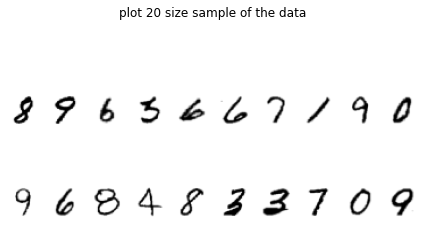

In [104]:
display_pictures(sampled_data_set,28,28,2,10)